<a href="https://colab.research.google.com/github/Vinaymahto808/predict_heart_disease/blob/main/predict_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# !pip install xgboost scikit-learn pandas matplotlib seaborn kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, confusion_matrix

print("Setup Complete!")

import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)
# Load the dataset from the downloaded kagglehub path.
# The dataset typically contains a 'heart.csv' file directly in the downloaded directory.
df = pd.read_csv(f"{path}/heart.csv")


Setup Complete!


100%|██████████| 6.18k/6.18k [00:00<00:00, 10.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2


In [ ]:
print("\n--- First 5 rows of the dataset ---\n")
print(df.head())

print("\n--- Dataset Information ---\n")
df.info()

print("\n--- Descriptive Statistics ---\n")
print(df.describe())


--- First 5 rows of the dataset ---

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

--- Dataset Information ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Coun

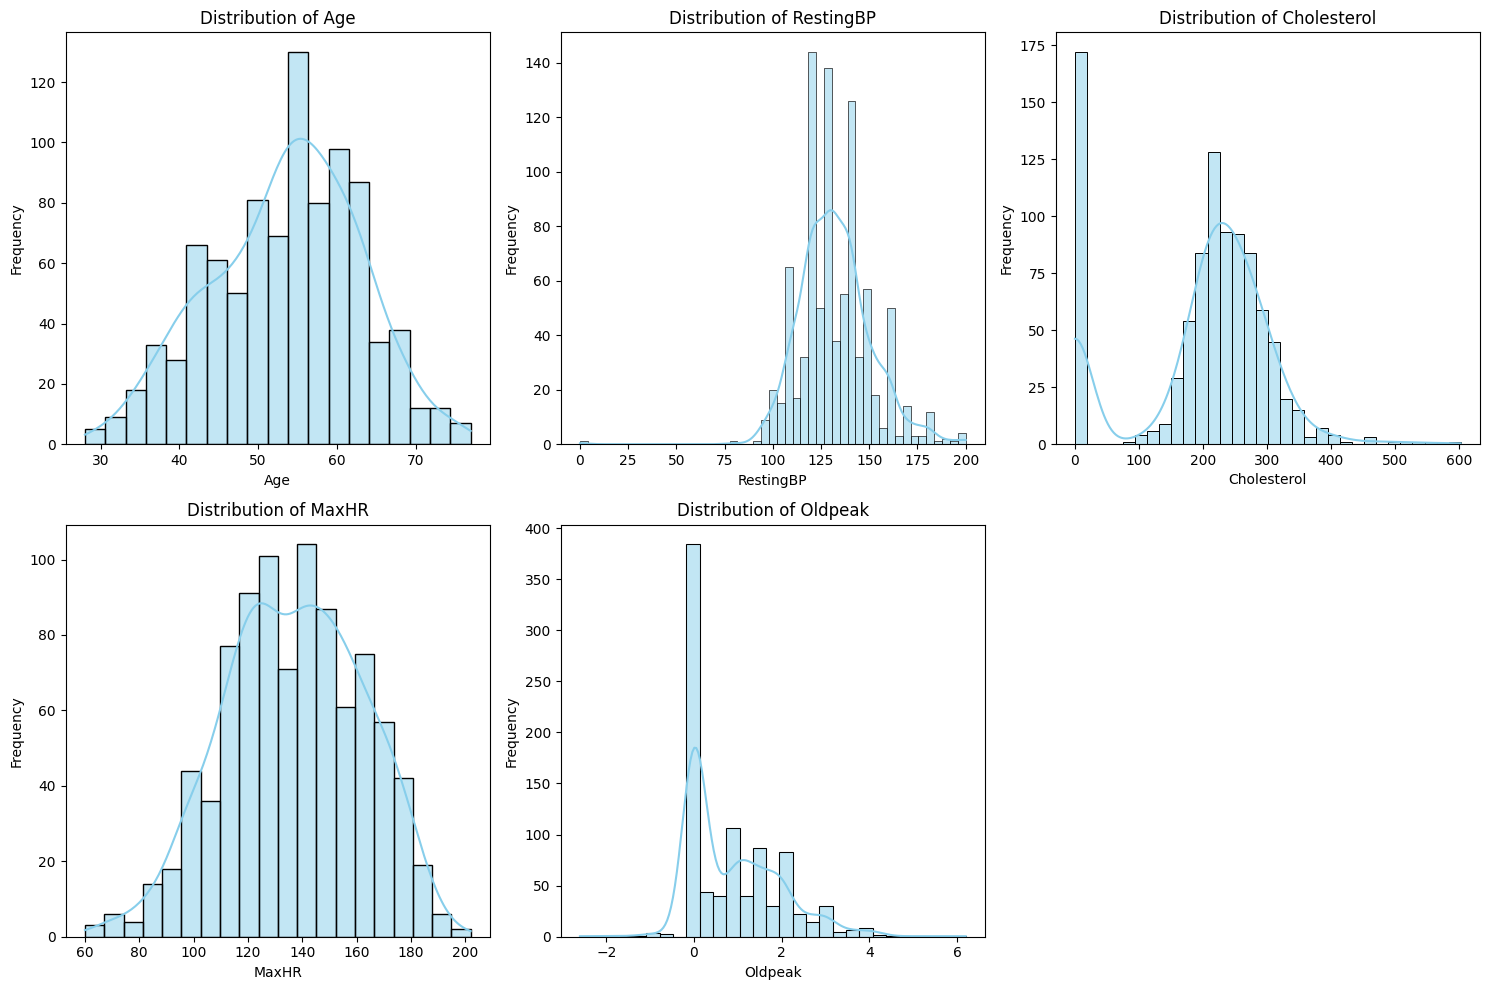

In [ ]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Create a 2x3 grid of subplots
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (734, 15)
Shape of X_test: (184, 15)
Shape of y_train: (734,)
Shape of y_test: (184,)


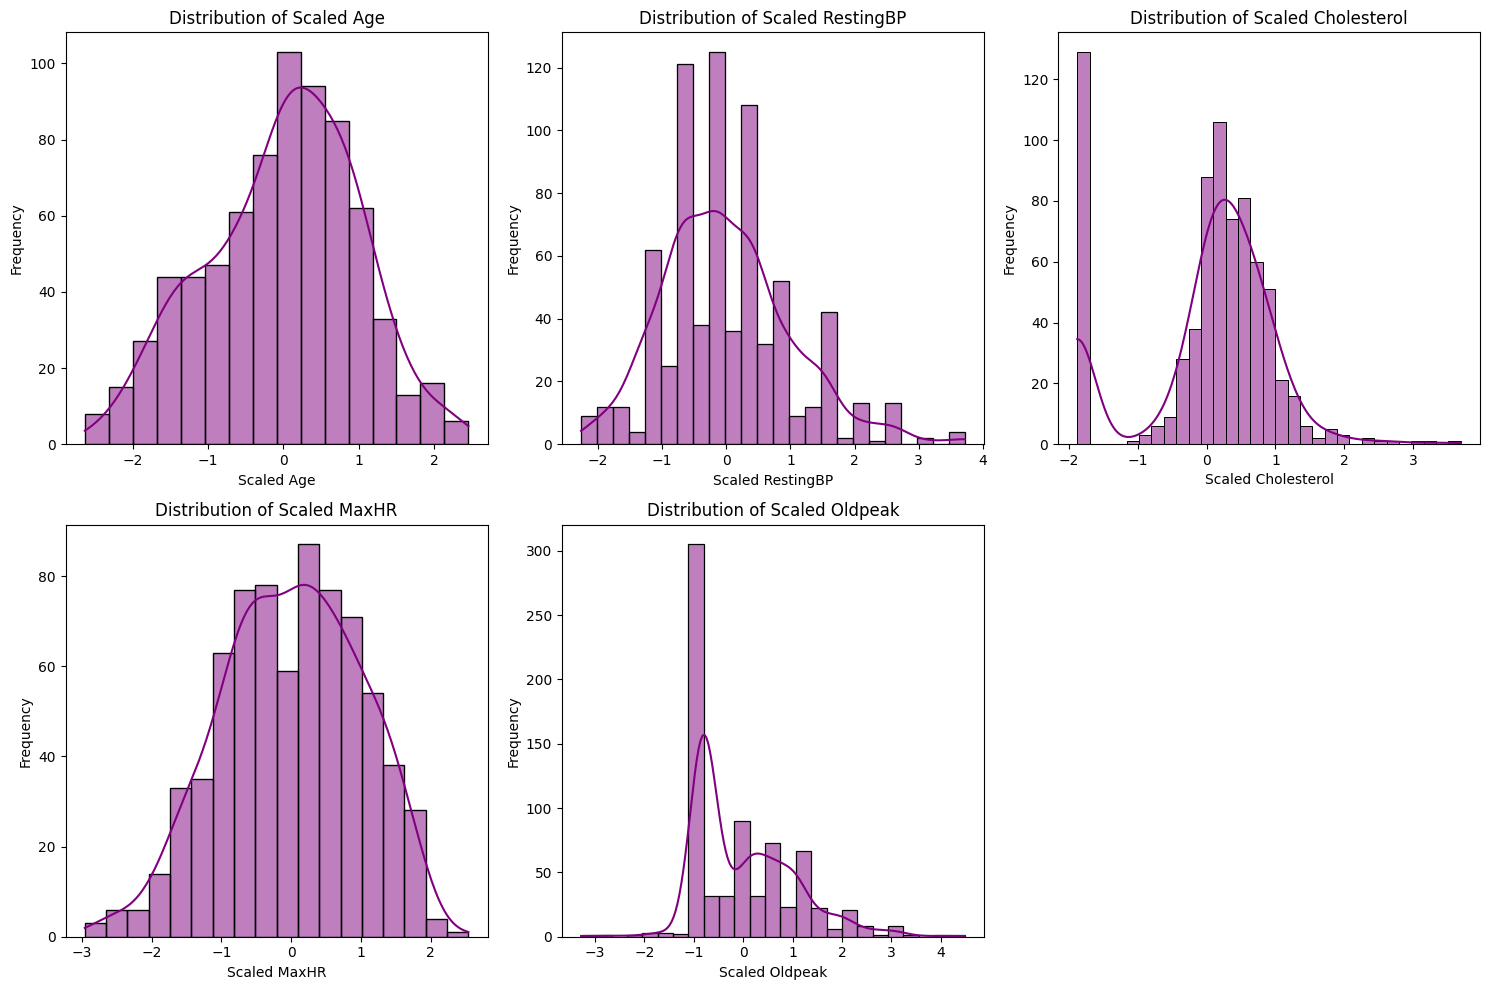

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify the column names of the numerical features
numerical_features_names = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Get the columns from the DataFrame X (before scaling but after one-hot encoding)
X_cols = X.columns

# 2. Create a list of the column indices corresponding to these numerical features in the X_train array
numerical_indices = [X_cols.get_loc(col) for col in numerical_features_names]

plt.figure(figsize=(15, 10))
for i, col_name in enumerate(numerical_features_names):
    plt.subplot(2, 3, i + 1) # Create a 2x3 grid of subplots
    # Select the corresponding column from the scaled X_train dataset using its index
    sns.histplot(X_train[:, numerical_indices[i]], kde=True, color='purple')
    plt.title(f'Distribution of Scaled {col_name}', fontsize=12)
    plt.xlabel(f'Scaled {col_name}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

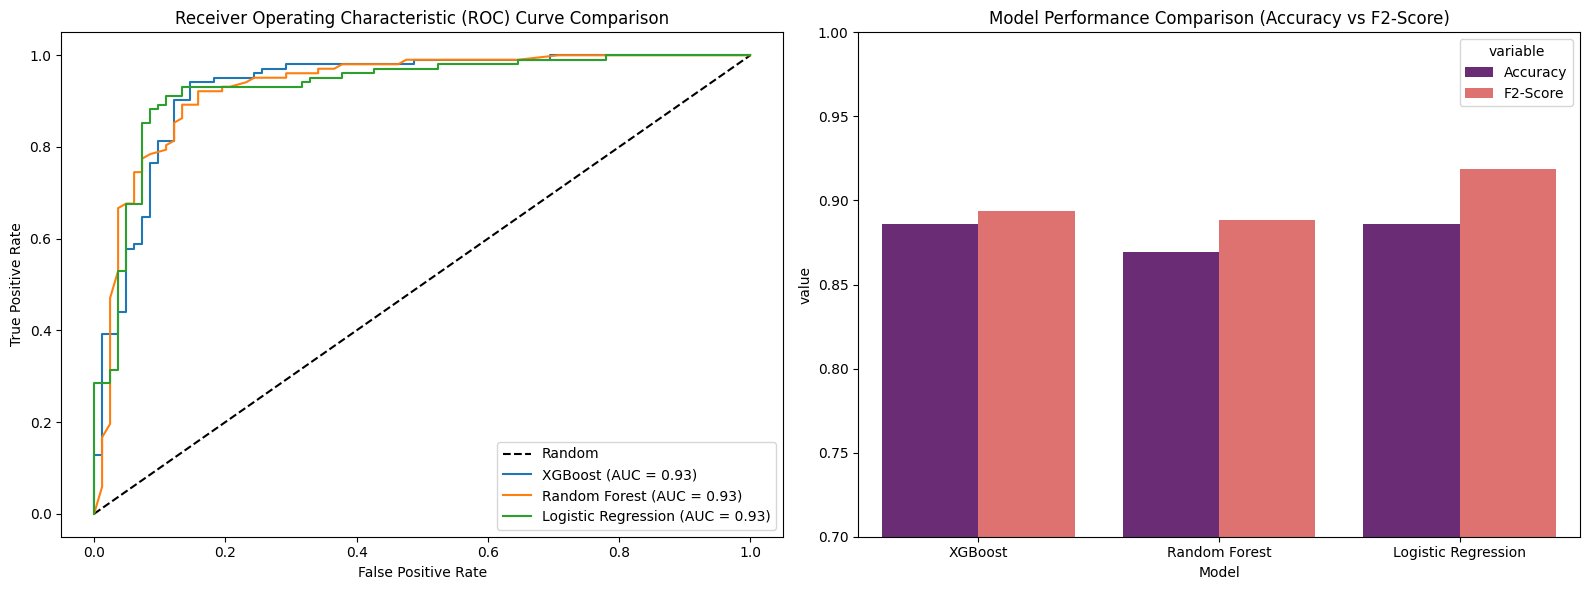

In [ ]:
results = []
roc_curves_data = []

# --- Loop models to train, evaluate, and store data ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Metrics calculate karein
    acc = accuracy_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2) # Recall ko priority
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    results.append({"Model": name, "Accuracy": acc, "F2-Score": f2, "AUC": roc_auc})
    roc_curves_data.append({"name": name, "fpr": fpr, "tpr": tpr, "roc_auc": roc_auc})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot ROC Curves (Subplot 1) ---
axes[0].plot([0, 1], [0, 1], 'k--', label='Random') # Random classifier baseline
for entry in roc_curves_data:
    axes[0].plot(entry['fpr'], entry['tpr'], label=f'{entry['name']} (AUC = {entry['roc_auc']:.2f})')

axes[0].set_title('Receiver Operating Characteristic (ROC) Curve Comparison')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# --- Model Comparison Bar Chart (Subplot 2) ---
comparison_df = pd.DataFrame(results)
# Melt the DataFrame to prepare for seaborn barplot with hue
melted_comparison_df = comparison_df.melt(id_vars='Model', value_vars=['Accuracy', 'F2-Score'])
sns.barplot(data=melted_comparison_df, x='Model', y='value', hue='variable', palette='magma', ax=axes[1])
axes[1].set_title('Model Performance Comparison (Accuracy vs F2-Score)')
axes[1].set_ylim(0.7, 1.0) # Set Y-axis limits for better comparison

plt.tight_layout()
plt.show()

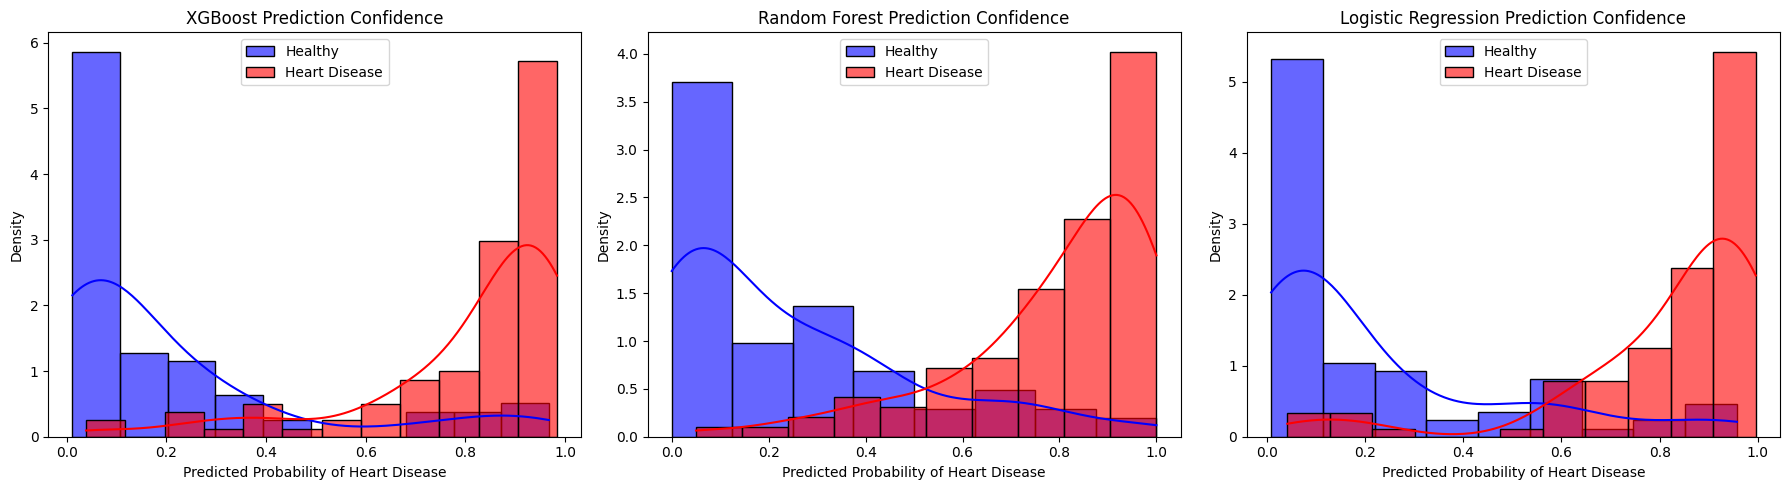

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure to hold all confidence histograms
plt.figure(figsize=(18, 5))

# Iterate through each trained model
for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, len(models), i + 1) # Create a subplot for each model

    # Get predicted probabilities for the positive class (Heart Disease)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Plot distributions for actual healthy and actual heart disease cases
    sns.histplot(y_probs[y_test == 0], color="blue", label="Healthy", kde=True, stat="density", alpha=0.6)
    sns.histplot(y_probs[y_test == 1], color="red", label="Heart Disease", kde=True, stat="density", alpha=0.6)

    plt.title(f'{name} Prediction Confidence')
    plt.xlabel('Predicted Probability of Heart Disease')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipython-input-2564039487.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_features.values, y=top_5_features.index, palette='viridis', ax=axes[0])


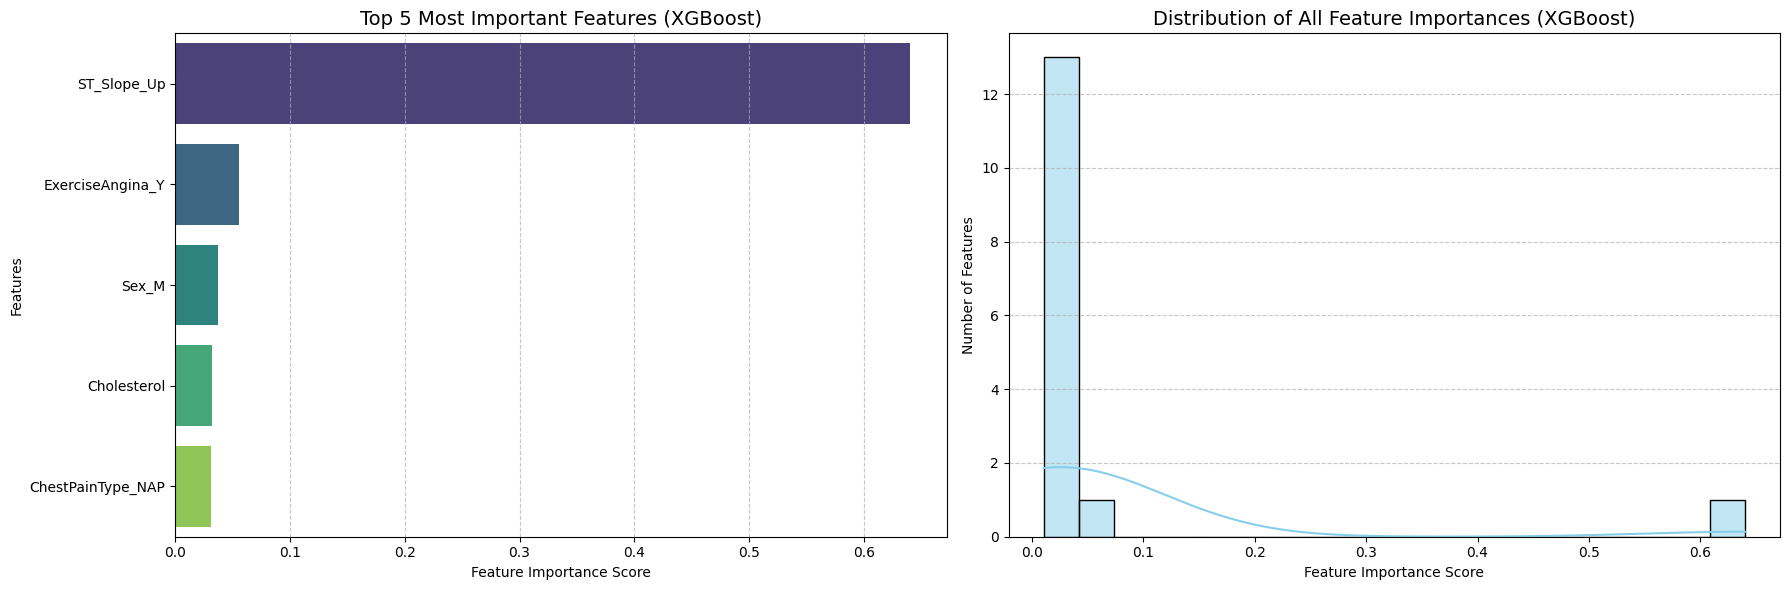

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Access the trained XGBoost model
xgb_model = models["XGBoost"]

# 2. Get the feature_importances_ attribute
feature_importances = xgb_model.feature_importances_

# 3. Create a Pandas Series to map these importance scores to the original feature names
#    Feature names are from X.columns (before scaling)
feature_names = X.columns
importance_series = pd.Series(feature_importances, index=feature_names)

# 4. Sort the feature importances in descending order and select the top 5
top_5_features = importance_series.nlargest(5)

# 5. Create a figure with two subplots for the top 5 features bar plot and all importances histogram
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Horizontal bar plot for top 5 feature importances
sns.barplot(x=top_5_features.values, y=top_5_features.index, palette='viridis', ax=axes[0])
axes[0].set_title('Top 5 Most Important Features (XGBoost)', fontsize=14)
axes[0].set_xlabel('Feature Importance Score')
axes[0].set_ylabel('Features')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Histogram for the distribution of all feature importances
sns.histplot(importance_series, bins=20, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of All Feature Importances (XGBoost)', fontsize=14)
axes[1].set_xlabel('Feature Importance Score')
axes[1].set_ylabel('Number of Features')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3029828013.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_features.values, y=top_5_features.index, palette='viridis', ax=axes[0], legend=False)


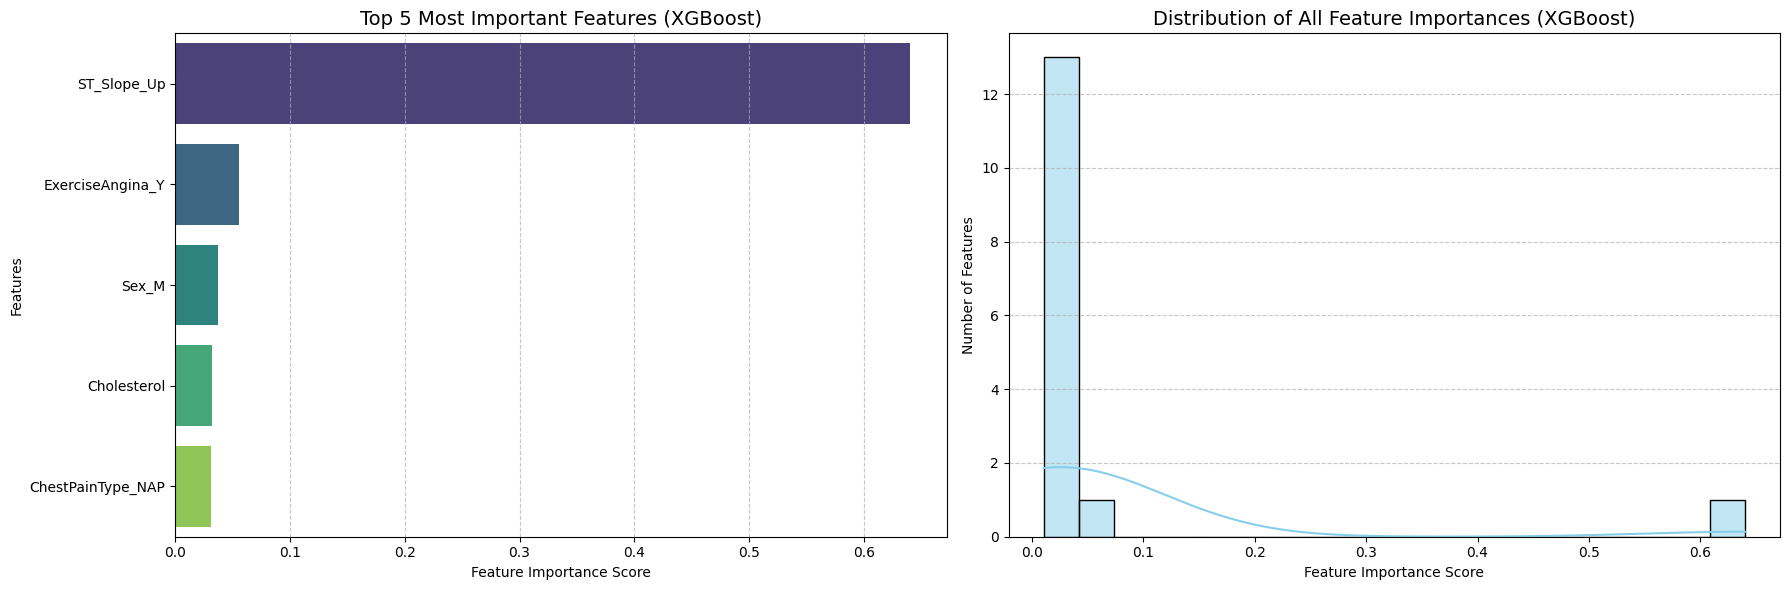

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Access the trained XGBoost model
xgb_model = models["XGBoost"]

# 2. Get the feature_importances_ attribute
feature_importances = xgb_model.feature_importances_

# 3. Create a Pandas Series to map these importance scores to the original feature names
#    Feature names are from X.columns (before scaling)
feature_names = X.columns
importance_series = pd.Series(feature_importances, index=feature_names)

# 4. Sort the feature importances in descending order and select the top 5
top_5_features = importance_series.nlargest(5)

# 5. Create a figure with two subplots for the top 5 features bar plot and all importances histogram
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Horizontal bar plot for top 5 feature importances
sns.barplot(x=top_5_features.values, y=top_5_features.index, palette='viridis', ax=axes[0], legend=False)
axes[0].set_title('Top 5 Most Important Features (XGBoost)', fontsize=14)
axes[0].set_xlabel('Feature Importance Score')
axes[0].set_ylabel('Features')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Histogram for the distribution of all feature importances
sns.histplot(importance_series, bins=20, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of All Feature Importances (XGBoost)', fontsize=14)
axes[1].set_xlabel('Feature Importance Score')
axes[1].set_ylabel('Number of Features')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

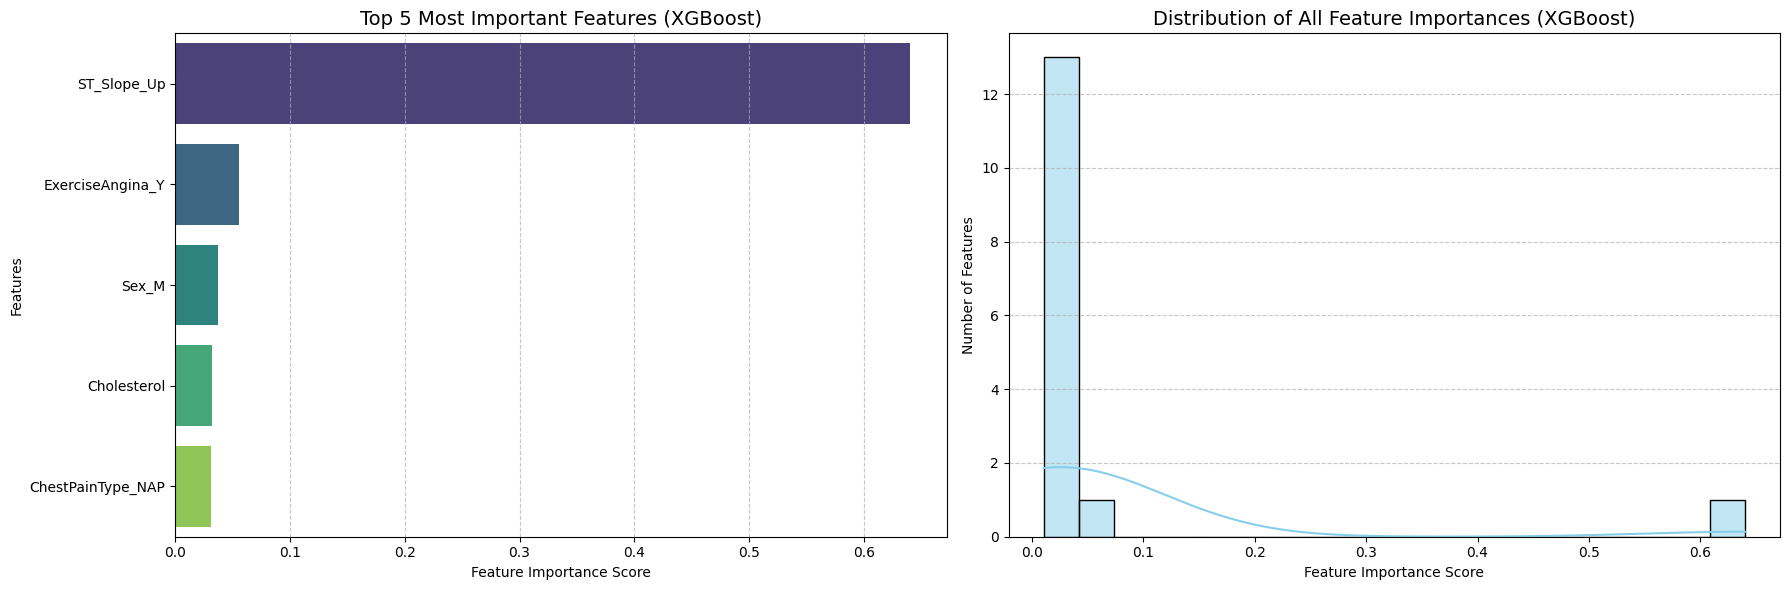

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Access the trained XGBoost model
xgb_model = models["XGBoost"]

# 2. Get the feature_importances_ attribute
feature_importances = xgb_model.feature_importances_

# 3. Create a Pandas Series to map these importance scores to the original feature names
#    Feature names are from X.columns (before scaling)
feature_names = X.columns
importance_series = pd.Series(feature_importances, index=feature_names)

# 4. Sort the feature importances in descending order and select the top 5
top_5_features = importance_series.nlargest(5)

# 5. Create a figure with two subplots for the top 5 features bar plot and all importances histogram
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Horizontal bar plot for top 5 feature importances
sns.barplot(x=top_5_features.values, y=top_5_features.index, hue=top_5_features.index, palette='viridis', ax=axes[0], legend=False)
axes[0].set_title('Top 5 Most Important Features (XGBoost)', fontsize=14)
axes[0].set_xlabel('Feature Importance Score')
axes[0].set_ylabel('Features')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Histogram for the distribution of all feature importances
sns.histplot(importance_series, bins=20, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of All Feature Importances (XGBoost)', fontsize=14)
axes[1].set_xlabel('Feature Importance Score')
axes[1].set_ylabel('Number of Features')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

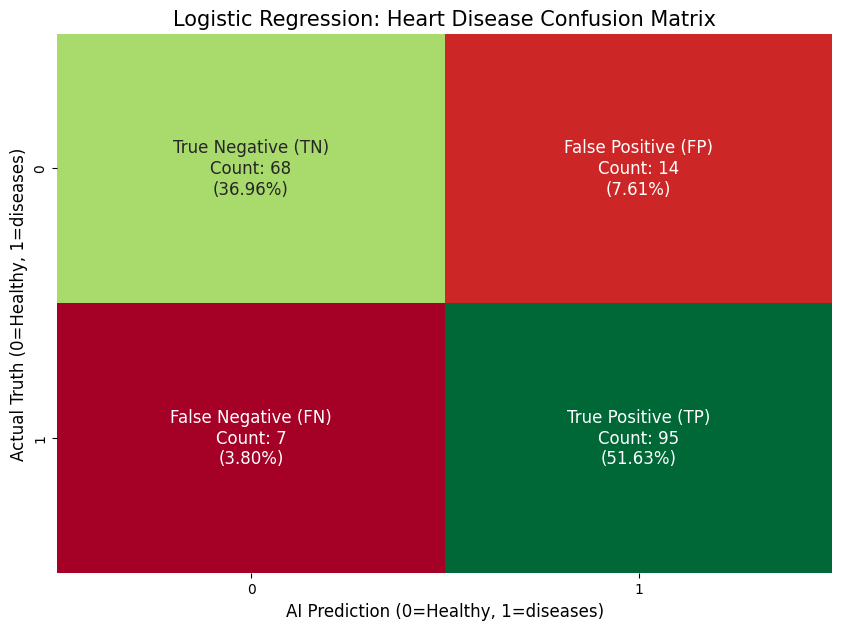

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Access the trained Logistic Regression model
log_reg_model = models["Logistic Regression"]

# 2. Predict the labels for the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# 3. Calculate the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# 4. Create custom labels for the confusion matrix cells (TN, FP, FN, TP)
group_names = ['True Negative (TN)', 'False Positive (FP)',
               'False Negative (FN)', 'True Positive (TP)']

# Har box ke liye counts nikalein
group_counts = ["{0:0.0f}".format(value) for value in cm_log_reg.flatten()]

# Har box ke liye percentage nikalein
group_percentages = ["{0:.2%}".format(value) for value in cm_log_reg.flatten()/np.sum(cm_log_reg)]

# Final Labels merge karein
labels = [f"{v1}\nCount: {v2}\n({v3})" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# 5. Heatmap Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm_log_reg, annot=labels, fmt="", cmap='RdYlGn', cbar=False, annot_kws={"size": 12})

# 6. Add title and axis labels
plt.title('Logistic Regression: Heart Disease Confusion Matrix', fontsize=15)
plt.xlabel('AI Prediction (0=Healthy, 1=diseases)', fontsize=12)
plt.ylabel('Actual Truth (0=Healthy, 1=diseases)', fontsize=12)

# 7. Display the plot
plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 1. Initialize XGBClassifier
xgb_model = XGBClassifier(random_state=42)

# 2. Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# 3. Initialize LogisticRegression
lr_model = LogisticRegression(random_state=42)

# 4. Create a dictionary of models
models = {
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'Logistic Regression': lr_model
}

print("Models initialized.")

# 5. Train each model using the scaled training data
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

print("All models trained!")

Models initialized.
Training XGBoost...
XGBoost trained successfully.
Training Random Forest...
Random Forest trained successfully.
Training Logistic Regression...
Logistic Regression trained successfully.
All models trained!


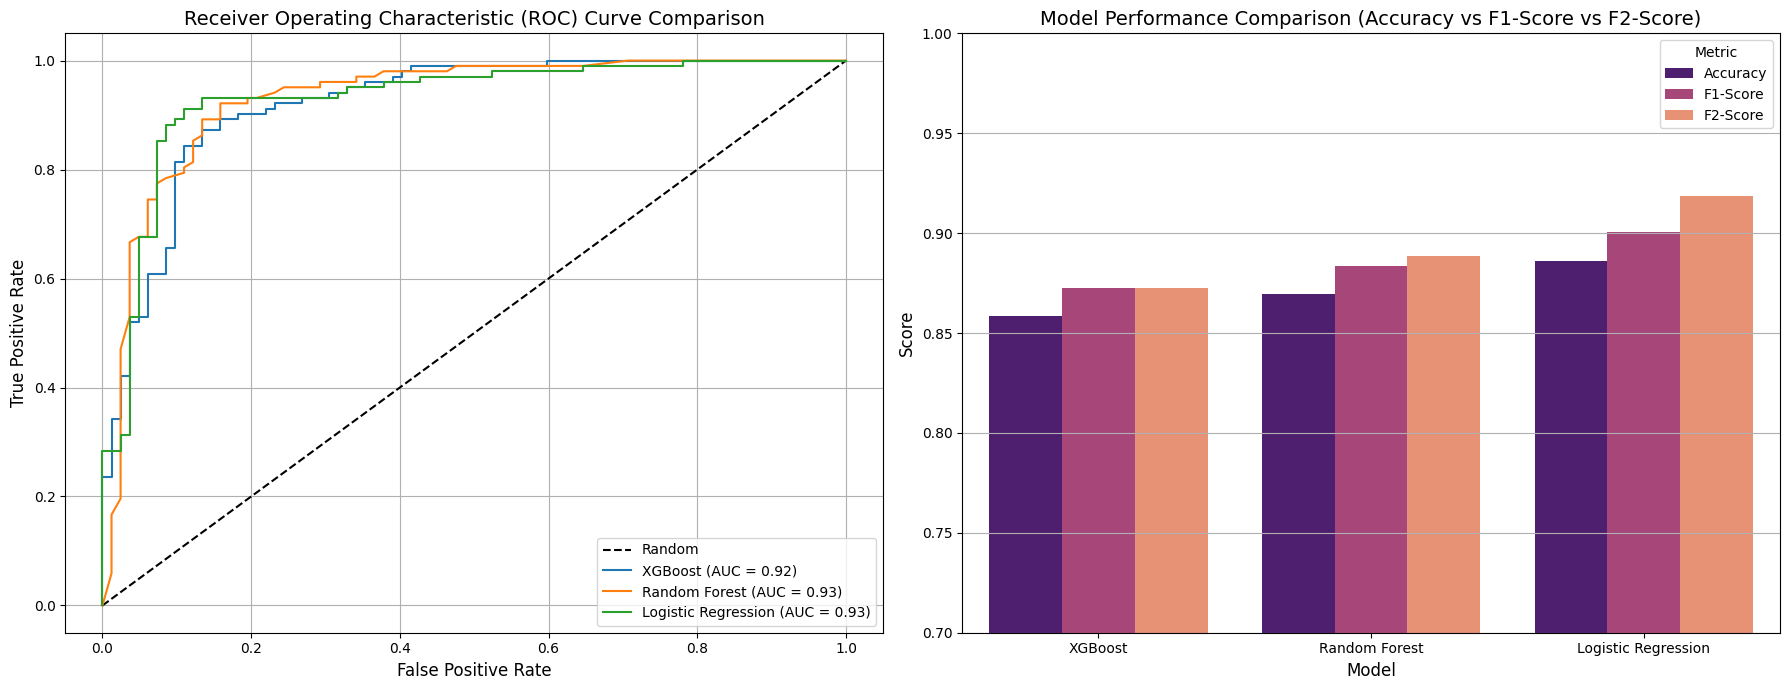

Model evaluation complete and plots generated.


In [ ]:
from sklearn.metrics import f1_score

results = []
roc_curves_data = []

# --- Loop models to train, evaluate, and store data ---
for name, model in models.items():
    # Models are already trained from the previous step
    # model.fit(X_train, y_train) # No need to re-train
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Metrics calculate karein
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2) # Recall ko priority
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    results.append({"Model": name, "Accuracy": acc, "F1-Score": f1, "F2-Score": f2, "AUC": roc_auc})
    roc_curves_data.append({"name": name, "fpr": fpr, "tpr": tpr, "roc_auc": roc_auc})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Plot ROC Curves (Subplot 1) ---
axes[0].plot([0, 1], [0, 1], 'k--', label='Random') # Random classifier baseline
for entry in roc_curves_data:
    axes[0].plot(entry['fpr'], entry['tpr'], label=f'{entry['name']} (AUC = {entry['roc_auc']:.2f})')

axes[0].set_title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=14)
axes[0].set_xlabel('False Positive Rate', fontsize=12)
axes[0].set_ylabel('True Positive Rate', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True)

# --- Model Comparison Bar Chart (Subplot 2) ---
comparison_df = pd.DataFrame(results)
# Melt the DataFrame to prepare for seaborn barplot with hue
melted_comparison_df = comparison_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1-Score', 'F2-Score'])
sns.barplot(data=melted_comparison_df, x='Model', y='value', hue='variable', palette='magma', ax=axes[1])
axes[1].set_title('Model Performance Comparison (Accuracy vs F1-Score vs F2-Score)', fontsize=14)
axes[1].set_ylim(0.7, 1.0) # Set Y-axis limits for better comparison
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].legend(title='Metric', fontsize=10)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

print("Model evaluation complete and plots generated.")

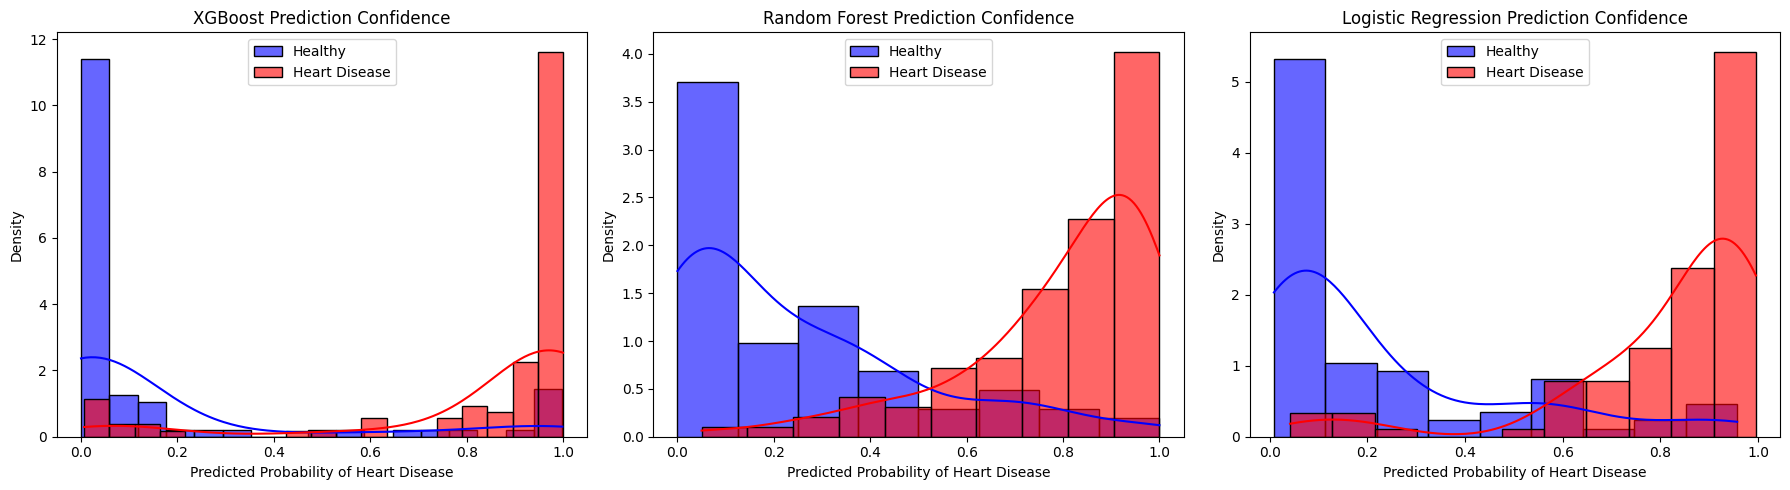

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure to hold all confidence histograms
plt.figure(figsize=(18, 5))

# Iterate through each trained model
for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, len(models), i + 1) # Create a subplot for each model

    # Get predicted probabilities for the positive class (Heart Disease)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Plot distributions for actual healthy and actual heart disease cases
    sns.histplot(y_probs[y_test == 0], color="blue", label="Healthy", kde=True, stat="density", alpha=0.6)
    sns.histplot(y_probs[y_test == 1], color="red", label="Heart Disease", kde=True, stat="density", alpha=0.6)

    plt.title(f'{name} Prediction Confidence')
    plt.xlabel('Predicted Probability of Heart Disease')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

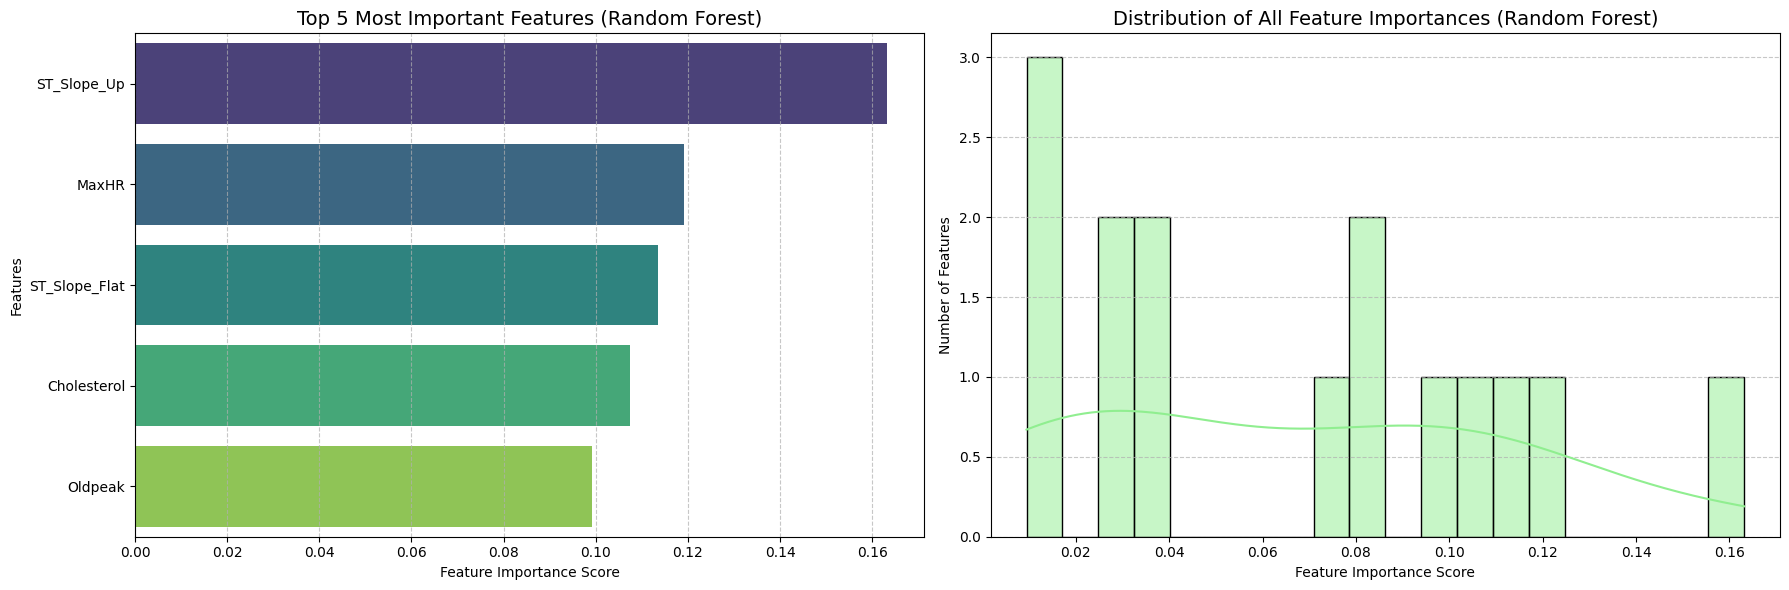

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Access the trained Random Forest model
rf_model = models["Random Forest"]

# 2. Get the feature_importances_ attribute
feature_importances_rf = rf_model.feature_importances_

# 3. Create a Pandas Series to map these importance scores to the original feature names
#    Feature names are from X.columns (before scaling)
feature_names = X.columns
importance_series_rf = pd.Series(feature_importances_rf, index=feature_names)

# 4. Sort the feature importances in descending order and select the top 5
top_5_features_rf = importance_series_rf.nlargest(5)

# 5. Create a figure with two subplots for the top 5 features bar plot and all importances histogram
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Horizontal bar plot for top 5 feature importances
sns.barplot(x=top_5_features_rf.values, y=top_5_features_rf.index, hue=top_5_features_rf.index, palette='viridis', ax=axes[0], legend=False)
axes[0].set_title('Top 5 Most Important Features (Random Forest)', fontsize=14)
axes[0].set_xlabel('Feature Importance Score')
axes[0].set_ylabel('Features')
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Histogram for the distribution of all feature importances
sns.histplot(importance_series_rf, bins=20, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title('Distribution of All Feature Importances (Random Forest)', fontsize=14)
axes[1].set_xlabel('Feature Importance Score')
axes[1].set_ylabel('Number of Features')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Confusion Matrix Analysis (for Random Forest)

# Generate a detailed confusion matrix for the Random Forest model. Visualize it as a heatmap showing True Positives, True Negatives, False Positives, and False Negatives, along with their counts and percentages.


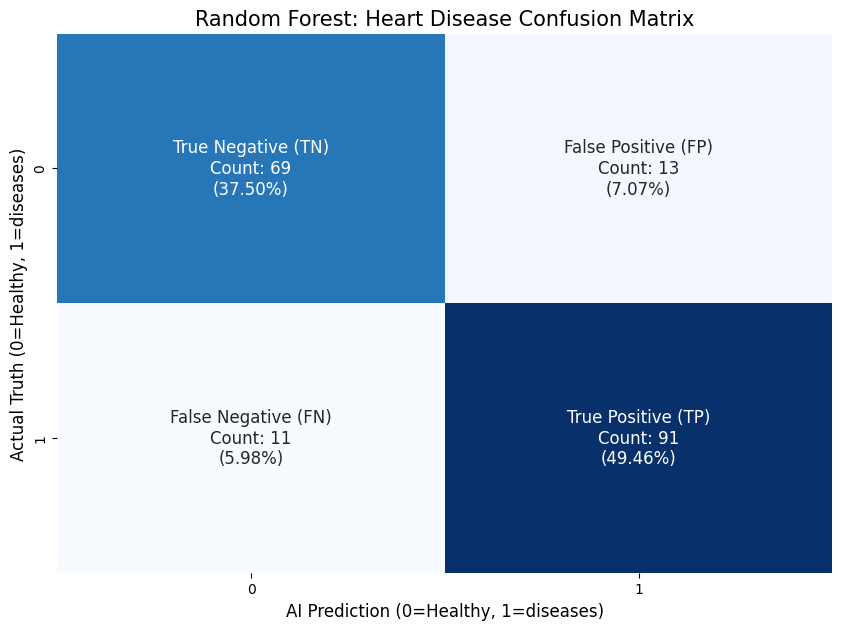

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Access the trained Random Forest model
rf_model = models["Random Forest"]

# 2. Predict the labels for the test set
y_pred_rf = rf_model.predict(X_test)

# 3. Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# 4. Create custom labels for the confusion matrix cells (TN, FP, FN, TP)
group_names = ['True Negative (TN)', 'False Positive (FP)',
               'False Negative (FN)', 'True Positive (TP)']

# Get counts for each box
group_counts = ["{0:0.0f}".format(value) for value in cm_rf.flatten()]

# Get percentages for each box
group_percentages = ["{0:.2%}".format(value) for value in cm_rf.flatten()/np.sum(cm_rf)]

# Merge labels, counts, and percentages
labels = [f"{v1}\nCount: {v2}\n({v3})" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# 5. Heatmap Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=labels, fmt="", cmap='Blues', cbar=False, annot_kws={"size": 12})

# 6. Add title and axis labels
plt.title('Random Forest: Heart Disease Confusion Matrix', fontsize=15)
plt.xlabel('AI Prediction (0=Healthy, 1=diseases)', fontsize=12)
plt.ylabel('Actual Truth (0=Healthy, 1=diseases)', fontsize=12)

# 7. Display the plot
plt.show()

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load the saved components
scaler = joblib.load('scaler.joblib')
model = joblib.load('logistic_regression_model.joblib')
feature_names = joblib.load('feature_names.joblib')

# --- Streamlit Application ---
st.set_page_config(page_title="Heart Disease Prediction", layout="centered")
st.title("Heart Disease Prediction Application")
st.write("Enter patient details to predict the likelihood of heart disease.")

# Input fields for numerical features
st.sidebar.header("Patient Data Input")
age = st.sidebar.slider("Age", 18, 100, 50)
resting_bp = st.sidebar.slider("Resting Blood Pressure (mm/Hg)", 80, 200, 120)
cholesterol = st.sidebar.slider("Cholesterol (mg/dl)", 0, 600, 200)
max_hr = st.sidebar.slider("Maximum Heart Rate Achieved", 60, 220, 150)
oldpeak = st.sidebar.slider("Oldpeak (ST depression induced by exercise relative to rest)", 0.0, 6.2, 1.0, 0.1)
fasting_bs = st.sidebar.selectbox("Fasting Blood Sugar > 120 mg/dl?", [0, 1], format_func=lambda x: "Yes" if x == 1 else "No")

# Input fields for categorical features
sex = st.sidebar.radio("Sex", ['Male', 'Female'])
chest_pain_type = st.sidebar.selectbox("Chest Pain Type", ['ATA', 'NAP', 'ASY', 'TA'])
resting_ecg = st.sidebar.selectbox("Resting ECG", ['Normal', 'ST', 'LVH'])
exercise_angina = st.sidebar.radio("Exercise Induced Angina", ['Yes', 'No'])
st_slope = st.sidebar.selectbox("ST Slope", ['Up', 'Flat', 'Down'])

# Map categorical inputs to numerical values/dummy variable logic
sex_male = 1 if sex == 'Male' else 0
exercise_angina_y = 1 if exercise_angina == 'Yes' else 0

# Create a dictionary for user input
user_input = {
    'Age': age,
    'RestingBP': resting_bp,
    'Cholesterol': cholesterol,
    'FastingBS': fasting_bs,
    'MaxHR': max_hr,
    'Oldpeak': oldpeak,
    'Sex_M': sex_male,
    'ChestPainType_ATA': 1 if chest_pain_type == 'ATA' else 0,
    'ChestPainType_NAP': 1 if chest_pain_type == 'NAP' else 0,
    'ChestPainType_TA': 1 if chest_pain_type == 'TA' else 0, # ASY is the reference category
    'RestingECG_Normal': 1 if resting_ecg == 'Normal' else 0,
    'RestingECG_ST': 1 if resting_ecg == 'ST' else 0, # LVH is the reference category
    'ExerciseAngina_Y': exercise_angina_y,
    'ST_Slope_Flat': 1 if st_slope == 'Flat' else 0,
    'ST_Slope_Up': 1 if st_slope == 'Up' else 0  # Down is the reference category
}

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Ensure all feature_names are present in user_df, add missing ones with 0
for col in feature_names:
    if col not in user_df.columns:
        user_df[col] = 0

# Drop any extra columns that might not be in feature_names
extra_cols = [col for col in user_df.columns if col not in feature_names]
if extra_cols:
    user_df = user_df.drop(columns=extra_cols)

# Reorder columns to match the training data
user_df = user_df[feature_names]

# Scale ALL features using the loaded scaler, as the scaler was fitted on 15 features.
# The result of scaler.transform is a numpy array, convert it back to DataFrame
user_df_scaled = pd.DataFrame(scaler.transform(user_df), columns=feature_names)


# Prediction button
if st.sidebar.button('Predict'):
    prediction = model.predict(user_df_scaled)
    prediction_proba = model.predict_proba(user_df_scaled)[:, 1]

    st.subheader("Prediction Results")
    if prediction[0] == 1:
        st.error(f"The model predicts a HIGH likelihood of Heart Disease with a probability of {prediction_proba[0]:.2f}")
    else:
        st.success(f"The model predicts a LOW likelihood of Heart Disease with a probability of {prediction_proba[0]:.2f}")

    st.write("### Input Features (Preprocessed and Scaled):")
    st.write(user_df_scaled)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Access the trained Logistic Regression model
log_reg_model = models["Logistic Regression"]

# Get the coefficients and feature names
coefficients = log_reg_model.coef_[0]
feature_names_lr = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names_lr, 'Coefficient': coefficients})

# Sort by absolute coefficient value to highlight most influential features
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Logistic Regression Feature Coefficients (Contribution to Heart Disease Risk)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()